# NIA Python Bootcamp Day 1 review

1. Python ecosystem of tools
2. Jupyter Notebook is code, output and documentation all in one document
3. Type code into cells, and to run them you press Shift-Enter
4. Different data types for different data
4. Tab completion reduces typing, shows you pop-up menu of all the things you can do with that piece of data
5. Operators take one or more input values and turn them into other values *based on the input values type*
6. Converting data from one type to another using the function syntax, e.g., <code>int()</code>

# Day 2: Drilling down into data

## Agenda for today

1. Exploring data types using the <code>TAB</code> key
2. Python syntax for taking slices of iterables
1. In-depth: NumPy arrays
3. Preview PANDAS DataFrames

## Exploring a data type's built-in functionality

Here's a function I wrote to get the sequences from a FASTA file. Don't get too concerned with the inner workings of the function at this point. Right now we just want to get some practice manipulating some data.

In [1]:
def load_nucleotide_from_fasta( file_name ):
    """Reads in a FASTA file and returns the sequence."""
    from Bio.SeqIO.FastaIO import SimpleFastaParser
    with open( file_name ) as f:
        for name, seq in SimpleFastaParser( f ):
            # Take only the first sequence in the file and quit
            pass
    print( "Loading FASTA:", name )
    return seq

In [2]:
nt = load_nucleotide_from_fasta( 'AAC37009.fasta' )

Loading FASTA: ENA|AAC37009|AAC37009.1 Escherichia coli RNA helicase-like protein


In [ ]:
nt

### What type of data does the name <code>nt</code> point to?

In [3]:
type( nt )

str

### How many nucleotides in this gene? Use <code>len()</code>

In [4]:
len(nt)

4617

### How many amino acids in this gene?

In [5]:
len(nt)/3

1539.0

### Use the tab key to see what else you can do with this string

* The pop-up menu with show a list of *attributes* associated with that value.
* Attributes is the technical term for all the functions and metadata that is attached to a value.
* Use the question mark if you want to learn more about an attribute and what it does

In [ ]:
nt.

In [ ]:
nt.isalnum?

In [6]:
nt.isalnum()

True

In [7]:
nt.count('G')

1344

### Use the <code>.count()</code> function that's built into most iterables to measure GC content %

In [8]:
(nt.count('G') + nt.count('C')) / len(nt)

0.5689841888672298

## Slicing Iterables

You can use the slice notation on lists, strings and more.

In [9]:
a_string = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

### Subsets: slicing iterables into smaller ones

Return a substring using a brackets separated by a colon.

In [10]:
len(a_string)

26

In [11]:
a_string[3:22]

'DEFGHIJKLMNOPQRSTUV'

### Slicing an iterable doesn't change the original iterable

Just because you just returned a substring from a string doesn't mean you changed the original string. Python created a new string and returned that

In [12]:
len(a_string)

26

### Slicing syntax

<code>[ begin index : end index : step ]</code>

* ***NOTE PYTHON SLICING CONVENTION:***  Iterable indices start from 0!!!!
* ***NOTE ANOTHER PYTHON SLICING CONVENTION:*** The begin index is inclusive, the end index is exclusive!!!!!

In [13]:
a_string[0]

'A'

In [14]:
a_string[25]

'Z'

In [15]:
a_string[26]

IndexError: string index out of range

The following translates to: "give me the slice from the 0th index inclusive, to the 26th index exclusive (i.e. the 25th index)

In [16]:
# This gives the whole alphabet:
a_string[0:26]

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [17]:
# This one leaves off the letter at the 25th index, which counting from 0 is Z:
a_string[0:25]

'ABCDEFGHIJKLMNOPQRSTUVWXY'

In [18]:
a_string[3:32:3] # take every 3rd letter

'DGJMPSVY'

### Slice from the beginning to the middle somewhere

Leave out the start index and Python assumes you want a slice starting from the beginning.

In [19]:
a_string[:8]

'ABCDEFGH'

### Slice from the middle somewhere to the end

Leave out the end index and Python assumes you want a slice that goes straight to the end.

In [20]:
a_string[20:]

'UVWXYZ'

### Negative slice indices mean count from the end

If i is negative, index is relative to end of string:

In [21]:
a_string[-25:]

'BCDEFGHIJKLMNOPQRSTUVWXYZ'

### Reverse a the order of an iterable using the step parameter

Reverse a string by using a negative step value

In [22]:
"a man, a plan, a canal, panama"[::-1]

'amanap ,lanac a ,nalp a ,nam a'

In [23]:
test = "a man, a plan, a canal, panama"

In [24]:
test

'a man, a plan, a canal, panama'

In [ ]:
nt[::-1]

## NumPy arrays

* Use for 1-D, 2-D, n-D data
* Use if you have data all of the same type (ints, floats, bools)

In [26]:
# import the package and give it a nickname "np" for short
import numpy as np

### Make a 1-D NumPy array from a <code>list</code>

In [27]:
a_list = [1,2,3,4,5,6,7,8,9,10]
an_array = np.array( a_list )

In [28]:
an_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Get the length of the NumPy array

In [29]:
len( an_array )

10

### Slice 1-D NumPy Arrays the same way you slice built-in Python iterables

In [30]:
an_array[ 5:]

array([ 6,  7,  8,  9, 10])

### NumPy arrays have many basic statistics and functions built-in

Use the <code>.TAB</code> trick to get the pop-up menu to see your options, and use the question mark to see each attribute's documentation.

In [31]:
an_array.max()

10

In [32]:
an_array.mean()

5.5

### Use index notation to change values in an array

In [33]:
an_array[4] = 42

In [34]:
an_array

array([ 1,  2,  3,  4, 42,  6,  7,  8,  9, 10])

### Matrix math: Multiply/divide by a constant

In [35]:
an_array * 10

array([ 10,  20,  30,  40, 420,  60,  70,  80,  90, 100])

### Matrix math: add/subtract constant

In [36]:
an_array

array([ 1,  2,  3,  4, 42,  6,  7,  8,  9, 10])

In [37]:
an_array - 1

array([ 0,  1,  2,  3, 41,  5,  6,  7,  8,  9])

### Matrix math: Z-Score normalization

1. Subtract the mean value (scalar) from all values
2. Divide all_values by the standard deviation (scalar)

In [38]:
# start with a fresh dataset
a_list = [1,2,3,4,5,6,7,8,9,10]
an_array = np.array( a_list )

In [39]:
(an_array - an_array.mean()) / an_array.std()

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

### Subselect based on a boolean criterion

#### Give me all values that are greater than a certain value

In [40]:
an_array[ an_array > 5]

array([ 6,  7,  8,  9, 10])

In [41]:
an_array > 5

array([False, False, False, False, False,  True,  True,  True,  True,  True], dtype=bool)

#### Give me all even numbers in this array, using the Modulus division operator %

In [42]:
an_array % 2

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [43]:
an_array % 2 == 0

array([False,  True, False,  True, False,  True, False,  True, False,  True], dtype=bool)

In [44]:
an_array[  an_array % 2 == 0 ]

array([ 2,  4,  6,  8, 10])

## 2-D NumPy Arrays

### Use NumPy's <code>arange()</code> function to quickly generate a list of counting numbers

In [45]:
new_array = np.arange(120)

In [46]:
new_array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [47]:
len(new_array)

120

In [48]:
new_array.shape

(120,)

In [49]:
new_array.mean()

59.5

### Use the <code>.reshape()</code> function to convert a 1-D array into 2-D

* Use (num_rows, num_cols) notation

In [50]:
new_array = new_array.reshape( (20, 6) )

In [51]:
new_array

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41],
       [ 42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53],
       [ 54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77],
       [ 78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101],
       [102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113],
       [114, 115, 116, 117, 118, 119]])

In [52]:
new_array.shape

(20, 6)

### Get the mean for the whole matrix

In [53]:
new_array.mean()

59.5

### Get the column wise mean

In [54]:
new_array.mean( axis=0 )

array([ 57.,  58.,  59.,  60.,  61.,  62.])

### Get the row-wise mean

In [55]:
new_array.mean( axis=1 )

array([   2.5,    8.5,   14.5,   20.5,   26.5,   32.5,   38.5,   44.5,
         50.5,   56.5,   62.5,   68.5,   74.5,   80.5,   86.5,   92.5,
         98.5,  104.5,  110.5,  116.5])

### Transpose the array using the <code>.T</code> attribute

In [56]:
new_array.T

array([[  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84,  90,  96, 102, 108, 114],
       [  1,   7,  13,  19,  25,  31,  37,  43,  49,  55,  61,  67,  73,
         79,  85,  91,  97, 103, 109, 115],
       [  2,   8,  14,  20,  26,  32,  38,  44,  50,  56,  62,  68,  74,
         80,  86,  92,  98, 104, 110, 116],
       [  3,   9,  15,  21,  27,  33,  39,  45,  51,  57,  63,  69,  75,
         81,  87,  93,  99, 105, 111, 117],
       [  4,  10,  16,  22,  28,  34,  40,  46,  52,  58,  64,  70,  76,
         82,  88,  94, 100, 106, 112, 118],
       [  5,  11,  17,  23,  29,  35,  41,  47,  53,  59,  65,  71,  77,
         83,  89,  95, 101, 107, 113, 119]])

In [57]:
new_array.T.shape

(6, 20)

### Zscore standardize by columns

In [58]:
# Use numpy's set_printoptions to change display precision
np.set_printoptions( precision = 2)

In [59]:
(new_array - new_array.mean(axis=0)) / new_array.std(axis=0)

array([[-1.65, -1.65, -1.65, -1.65, -1.65, -1.65],
       [-1.47, -1.47, -1.47, -1.47, -1.47, -1.47],
       [-1.3 , -1.3 , -1.3 , -1.3 , -1.3 , -1.3 ],
       [-1.13, -1.13, -1.13, -1.13, -1.13, -1.13],
       [-0.95, -0.95, -0.95, -0.95, -0.95, -0.95],
       [-0.78, -0.78, -0.78, -0.78, -0.78, -0.78],
       [-0.61, -0.61, -0.61, -0.61, -0.61, -0.61],
       [-0.43, -0.43, -0.43, -0.43, -0.43, -0.43],
       [-0.26, -0.26, -0.26, -0.26, -0.26, -0.26],
       [-0.09, -0.09, -0.09, -0.09, -0.09, -0.09],
       [ 0.09,  0.09,  0.09,  0.09,  0.09,  0.09],
       [ 0.26,  0.26,  0.26,  0.26,  0.26,  0.26],
       [ 0.43,  0.43,  0.43,  0.43,  0.43,  0.43],
       [ 0.61,  0.61,  0.61,  0.61,  0.61,  0.61],
       [ 0.78,  0.78,  0.78,  0.78,  0.78,  0.78],
       [ 0.95,  0.95,  0.95,  0.95,  0.95,  0.95],
       [ 1.13,  1.13,  1.13,  1.13,  1.13,  1.13],
       [ 1.3 ,  1.3 ,  1.3 ,  1.3 ,  1.3 ,  1.3 ],
       [ 1.47,  1.47,  1.47,  1.47,  1.47,  1.47],
       [ 1.65,  1.65,  1.65,  1

## Subselecting a 2-D array using slicing

* The syntax for slicing on a 2-D NumPy array is similar to 1-D, except you use a comma.
* Rows, then columns

In [60]:
new_array = np.arange(25).reshape( (5, 5) )

In [61]:
new_array

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [62]:
new_array[0,0]

0

In [63]:
new_array[3,3]

18

In [64]:
new_array[2:4, 2:4]

array([[12, 13],
       [17, 18]])

### Use the colon : to indicate all rows or all columns

In [65]:
new_array[:, 2:4 ]

array([[ 2,  3],
       [ 7,  8],
       [12, 13],
       [17, 18],
       [22, 23]])

## Example Image data as a 3-D NumPy array

In [66]:
# Use the Python package matplotlib to render images and output them directly to Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
from skimage.data import astronaut

In [68]:
image_data = astronaut()

### An RGB image has three color channels corresponding to Red Green and Blue

In [69]:
image_data.shape

(512, 512, 3)

### Using matplotlib's <code>imshow()</code> function to see an image

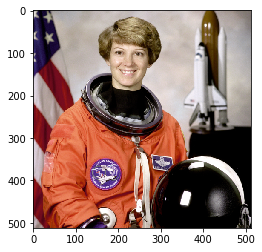

In [70]:
plt.imshow( image_data )

### Subselect part of the image to show using slicing

In [ ]:
image_data[ :100, :100, :]

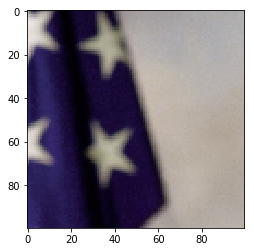

In [72]:
plt.imshow( image_data[ :100, :100, :] )

### Zero out part of the blue channel

In [73]:
image_data[ :100, :100, 2] = 0

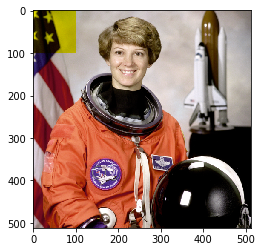

In [74]:
plt.imshow( image_data )

## PANDAS DataFrame

* Emulate R's <code>data.frame</code> structure.
* Basically a NumPy matrix with
    * Row and column names
    * Can have columns of different types
    * Handles missing data better

In [75]:
import pandas as pd

In [76]:
titanic_data_url  = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [77]:
titanic = pd.read_excel( titanic_data_url )

In [78]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [79]:
len( titanic )

1309

### Change the number of rows Pandas will display using the <code>set_option()</code> function

Use the word <code>None</code> if you want to display all of them.

In [ ]:
pd.set_option( 'display.max_rows', None )

# If we have time: Breast Cancer Dataset exploration

* dataset information [here](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-database)
* dataset originally published here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


In [80]:
from sklearn.datasets import load_breast_cancer

In [81]:
package = load_breast_cancer()

In [82]:
package.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [83]:
data = package['data']

In [84]:
data.shape

(569, 30)

In [ ]:
print(package['DESCR'])

In [85]:
package['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')